<a target="_blank" href="https://colab.research.google.com/github/huseyinegg/IE423-2024SUMMER/blob/main/M.HuseyinBeyribey_IE423_TASK3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load The Data



In [207]:
dfBFriday = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/black_friday.csv')

In [208]:
dfBFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [209]:
dfBFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [210]:
dfBFriday.columns.tolist()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [211]:
dfBFriday.duplicated().value_counts()

False    550068
Name: count, dtype: int64

We having total 550068 number of rows data including NaN value with **no** duplicated data. So, first task to convert the given data into useful data. Now I will investigate more the nature of the data (which columns include NaN values which are numerical, which are non-numerical.)



In [212]:
string_columns = dfBFriday[dfBFriday.columns.tolist()].select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBFriday.columns if dfBFriday[col].dtype in ['int64', 'float64']]

print("String Columns: {string_columns}".format(string_columns=string_columns))
print("Numerical Columns: {numerical_columns}".format(numerical_columns=numerical_columns))

String Columns: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Numerical Columns: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [213]:
dfBFriday.rename(columns=str.lower,inplace=True) #Convertig all the columns name in the lowercase for easy use.

In [214]:
string_columns = dfBFriday[dfBFriday.columns.tolist()].select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBFriday.columns if dfBFriday[col].dtype in ['int64', 'float64']]

print("String Columns: {string_columns}".format(string_columns=string_columns))
print("Numerical Columns: {numerical_columns}".format(numerical_columns=numerical_columns))

String Columns: ['product_id', 'gender', 'age', 'city_category', 'stay_in_current_city_years']
Numerical Columns: ['user_id', 'occupation', 'marital_status', 'product_category_1', 'product_category_2', 'product_category_3', 'purchase']


In [215]:
dfBFriday.isna().sum()

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64

I will individually examine columns to have a insight about how to deal with missing, and non-numerical data

**user_id**

In [216]:
print(dfBFriday.user_id)
dfBFriday.user_id.isna().sum()

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64


0

**product_id**

In [217]:
print(dfBFriday.product_id)
dfBFriday.product_id.isna().sum()

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object


0

**gender**

In [218]:
print(dfBFriday.gender)
print(dfBFriday.gender.isna().sum())
print(dfBFriday.gender.unique())

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: gender, Length: 550068, dtype: object
0
['F' 'M']


we have two unique genders.

In [219]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfBFriday['gender'] = label_encoder.fit_transform(dfBFriday['gender'])
print(dfBFriday.gender)
print(dfBFriday.gender.isna().sum())
print(dfBFriday.gender.unique())

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: gender, Length: 550068, dtype: int64
0
[0 1]


0 is female. 1 is male

**age**

In [220]:
print(dfBFriday.age)
print(dfBFriday.age.isna().sum())
print(dfBFriday.age.unique())

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: age, Length: 550068, dtype: object
0
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [221]:
dfBFriday.age.dtype

dtype('O')

Age is non-numerical column but it can easily be labeled. Thefore I am taking note. ***`Age` will be labeled. Categorical data.***



In [222]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfBFriday['age'] = label_encoder.fit_transform(dfBFriday['age'])
print(dfBFriday.age)
print(dfBFriday.age.isna().sum())
print(dfBFriday.age.unique())

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: age, Length: 550068, dtype: int64
0
[0 6 2 4 5 3 1]


**occupation**

In [223]:
print(dfBFriday.occupation)
print(dfBFriday.occupation.isna().sum())
print(dfBFriday.occupation.unique())

0         10
1         10
2         10
3         10
4         16
          ..
550063    13
550064     1
550065    15
550066     1
550067     0
Name: occupation, Length: 550068, dtype: int64
0
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


**city_category**

In [224]:
print(dfBFriday.city_category)
print(dfBFriday.city_category.isna().sum())
print(dfBFriday.city_category.unique())

0         A
1         A
2         A
3         A
4         C
         ..
550063    B
550064    C
550065    B
550066    C
550067    B
Name: city_category, Length: 550068, dtype: object
0
['A' 'C' 'B']


city_category is non-numerical column but it can easily be labeled it includes 3 category. Thefore I am taking note. ***`city_category` will be labeled. Categorical data.***

In [225]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfBFriday['city_category'] = label_encoder.fit_transform(dfBFriday['city_category'])
print(dfBFriday.city_category)
print(dfBFriday.city_category.isna().sum())
print(dfBFriday.city_category.unique())

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: city_category, Length: 550068, dtype: int64
0
[0 2 1]


**stay_in_current_city_years**

In [226]:
print(dfBFriday.stay_in_current_city_years)
print(dfBFriday.stay_in_current_city_years.isna().sum())
print(dfBFriday.stay_in_current_city_years.unique())

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: stay_in_current_city_years, Length: 550068, dtype: object
0
['2' '4+' '3' '1' '0']


***`stay_in_current_city_years` can be labeled. Categorical data.***But instead of bothering with labeling stay_in_current_city_years I will just replace "4+" with 4, to make it an integer column.

In [227]:
dfBFriday.stay_in_current_city_years = dfBFriday.stay_in_current_city_years.replace("4+",'4').astype(int)
dfBFriday.stay_in_current_city_years.value_counts()

stay_in_current_city_years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

**marital_status**

In [228]:
print(dfBFriday.marital_status)
print(dfBFriday.marital_status.isna().sum())
print(dfBFriday.marital_status.unique())

0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: marital_status, Length: 550068, dtype: int64
0
[0 1]


In [229]:
dfBFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  int64  
 3   age                         550068 non-null  int64  
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  int64  
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  int64  
 9   product_category_2          376430 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


Now only product_id's Dtype is non-numerical.

**product_id**

In [230]:
len(dfBFriday.product_id.unique())

3631

3631 unique values, too many to encode. I will just drop product_id column. I don't think it gives important information.

In [231]:
dfBFriday = dfBFriday.drop(columns=['product_id'])

In [232]:
dfBFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   gender                      550068 non-null  int64  
 2   age                         550068 non-null  int64  
 3   occupation                  550068 non-null  int64  
 4   city_category               550068 non-null  int64  
 5   stay_in_current_city_years  550068 non-null  int64  
 6   marital_status              550068 non-null  int64  
 7   product_category_1          550068 non-null  int64  
 8   product_category_2          376430 non-null  float64
 9   product_category_3          166821 non-null  float64
 10  purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


**purchase**

In [233]:
print(dfBFriday.purchase)
print(dfBFriday.purchase.isna().sum())
print(dfBFriday.purchase.unique())

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: purchase, Length: 550068, dtype: int64
0
[ 8370 15200  1422 ...   135   123   613]


Now all data is numerical. Time to handle missing data.

**product_category**

In [234]:
dfBFriday[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [235]:
print(dfBFriday.product_category_1)
print(dfBFriday.product_category_1.isna().sum())
print(dfBFriday.product_category_1.unique())

0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: product_category_1, Length: 550068, dtype: int64
0
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


product_category_1 doesn't necessitate to be handled. Because it doesn't contain any NaN value.

In [236]:
print(dfBFriday.product_category_2)
print(dfBFriday.product_category_2.isna().sum())
print(dfBFriday.product_category_2.unique())

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: product_category_2, Length: 550068, dtype: float64
173638
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


**product_category_2** includes `173638` NaN value.

In [237]:
print(dfBFriday.product_category_3)
print(dfBFriday.product_category_3.isna().sum())
print(dfBFriday.product_category_3.unique())

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: product_category_3, Length: 550068, dtype: float64
383247
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


**product_category_3** includes `383247` NaN value.

### Before handling missin data. I will check my current Data Frame **dfBFriday** and save it.



In [238]:
dfBFriday.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,1,6,16,2,4,0,8,NaN,NaN,7969


In [239]:
dfBFriday.to_csv('/content/drive/MyDrive/Colab Notebooks/data/Black_Friday_Numericalwithmissing.csv')

# Handling Missing Data

In [240]:
y = dfBFriday.loc[:,['purchase']].values.ravel()
X = dfBFriday.drop(['purchase'],axis=1)

In [241]:
y.shape

(550068,)

In [242]:
X.shape

(550068, 10)

In [243]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function for building and scoring Random Forest models
def get_random_forest_scores(X_train, X_test, y_train, y_test):
    mdlRfsMlb = RandomForestRegressor(random_state=1)

    mdlRfsMlb.fit(X_train, y_train)

    y_tst_prd = mdlRfsMlb.predict(X_test)

    mae = mean_absolute_error(y_test, y_tst_prd)
    mse = mean_squared_error(y_test, y_tst_prd)
    r2 = r2_score(y_test, y_tst_prd)

    return {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }


Okey while analyzing. Whether it is a good estimate or not knowing distrubition of purchase is necessary. Therefore I will analyze "purchase" column a little bit more.

In [245]:
purchase_mean = dfBFriday['purchase'].mean()
purchase_median = dfBFriday['purchase'].median()
purchase_variance = dfBFriday['purchase'].var()
purchase_std = dfBFriday['purchase'].std()

purchase_distribution_stats = {
    "Mean": purchase_mean,
    "Median": purchase_median,
    "Variance": purchase_variance,
    "Standard Deviation": purchase_std
}

purchase_distribution_stats


{'Mean': 9263.968712959126,
 'Median': 8047.0,
 'Variance': 25231185.950597923,
 'Standard Deviation': 5023.065393820582}

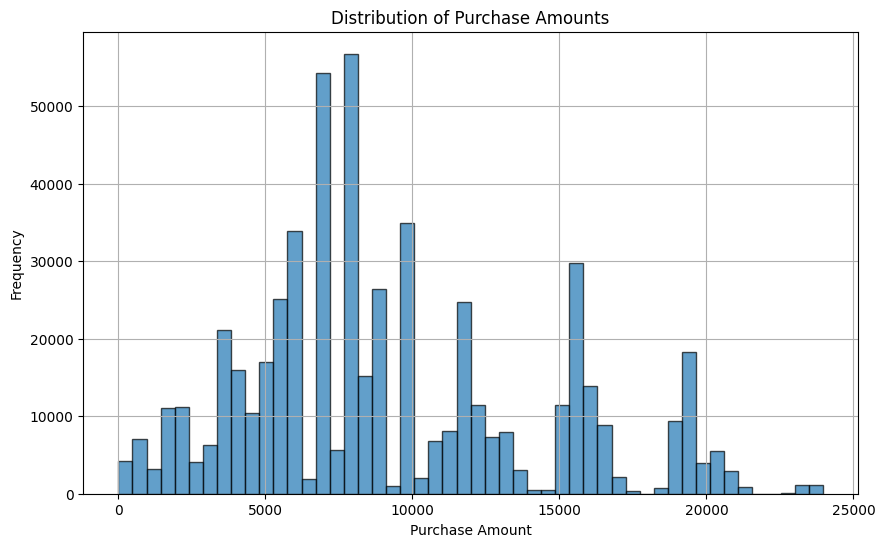

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(dfBFriday['purchase'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Also, don't forget R-Squared is just the MSE divided by the MSE of the prediction of the mean, which is a constant. So MSE and R-Squared are proportional to each other and the ranking will never be different between these two measures. Therefore while ranking approaches, I will check R-Squared scores.

#### Approach 1. Drop columns with missing values
It is not optional but I'm doing just to try.

In [247]:
cols_num_null = [col for col in X_train.columns
    if X_train[col].isnull().any()]
X_train_nulldropped_app1 = X_train.drop(cols_num_null, axis=1)
X_test_nulldropped_app1 = X_test.drop(cols_num_null, axis=1)

In [248]:
# Impute missing values in y_train (replace NaN with the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()  # Reshape for the imputer, then flatten
y_test_imputed = imputer.fit_transform(y_test.reshape(-1, 1)).ravel()

print('Value from Approach 1 (Drop features with missing values):')
print(get_random_forest_scores(X_train_nulldropped_app1, X_test_nulldropped_app1, y_train_imputed, y_test_imputed)) # Use imputed y_train and y_test

Value from Approach 1 (Drop features with missing values):
{'MAE': 2086.9821853547915, 'MSE': 8248959.947052138, 'R2': 0.6742735411012963}


#### Approach 2. Fill missing values by Imputation
**Imputation** fills in the missing values with some number. For instance, we can fill in the mean value along each column.

In [249]:
# Impute missing values in y_train and y_test (replace NaN with the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = imputer.fit_transform(y_test.reshape(-1, 1)).ravel()

# Replace with specific value (0, bfill, ffill)
Xnum_train_repnull = X_train.fillna(method = 'ffill')
Xnum_test_repnull = X_test.fillna(method = 'ffill')

# Add this line to fill any remaining NaNs with 0
Xnum_train_repnull = Xnum_train_repnull.fillna(0)
Xnum_test_repnull = Xnum_test_repnull.fillna(0)

print('MAE from Approach 2 (Replace missing values with forward fill):')
print(get_random_forest_scores(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test)) # Pass the imputed y_train and y_test

MAE from Approach 2 (Replace missing values with forward fill):
{'MAE': 2218.8003691716895, 'MSE': 9205612.979395544, 'R2': 0.6364982086205899}


In [250]:
# Replace with mean value
Xnum_train_repnull = X_train.fillna(X_train.mean())
Xnum_test_repnull = X_test.fillna(X_test.mean())

print('MAE from Approach 2 (Replace missing values with mean):')
print(get_random_forest_scores(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test))

MAE from Approach 2 (Replace missing values with mean):
{'MAE': 2154.1957010239944, 'MSE': 8856132.997534517, 'R2': 0.6502981152364846}


Interestingly, instead of filling the data with mean value just dropping NaN values gave us better R2-score. We observed our variance is high ` 'Variance': 25231185.950597923,` it may be due to it. Therefore, I will now apply another approach.

#### Approach 3. Look at the other columns and try to figure out relationship within NaN values at other columns.

In [251]:
age_2 = dfBFriday.groupby('age')['product_category_2'].agg(pd.Series.mode)
age_3 = dfBFriday.groupby('age')['product_category_3'].agg(pd.Series.mode)
occupation_2 = dfBFriday.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
occupation_3 = dfBFriday.groupby('occupation')['product_category_3'].agg(pd.Series.mode)
gender_2 = dfBFriday.groupby('gender')['product_category_2'].agg(pd.Series.mode)
gender_3 = dfBFriday.groupby('gender')['product_category_3'].agg(pd.Series.mode)
#The mode is the value that appears most often. There can be multiple modes.
#The purpose of these lines is to find the most frequently occurring value (mode)
#in the 'product_category_2' and 'product_category_3' columns for each unique value '''

In [252]:
age_2

age
0    4.0
1    8.0
2    8.0
3    8.0
4    8.0
5    8.0
6    8.0
Name: product_category_2, dtype: float64

I labeled column "age" therefore this output simply same thing as:

0-17     4.0 <br />
18-25    8.0 <br />
26-35    8.0 <br />
36-45    8.0 <br />
46-50    8.0 <br />
51-55    8.0 <br />
55+      8.0 <br />

In [253]:
dfBFriday["product_category_2"].head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: product_category_2, dtype: float64

For example: if age in category 1 mode of most occuring value of product_category_2 is 8.

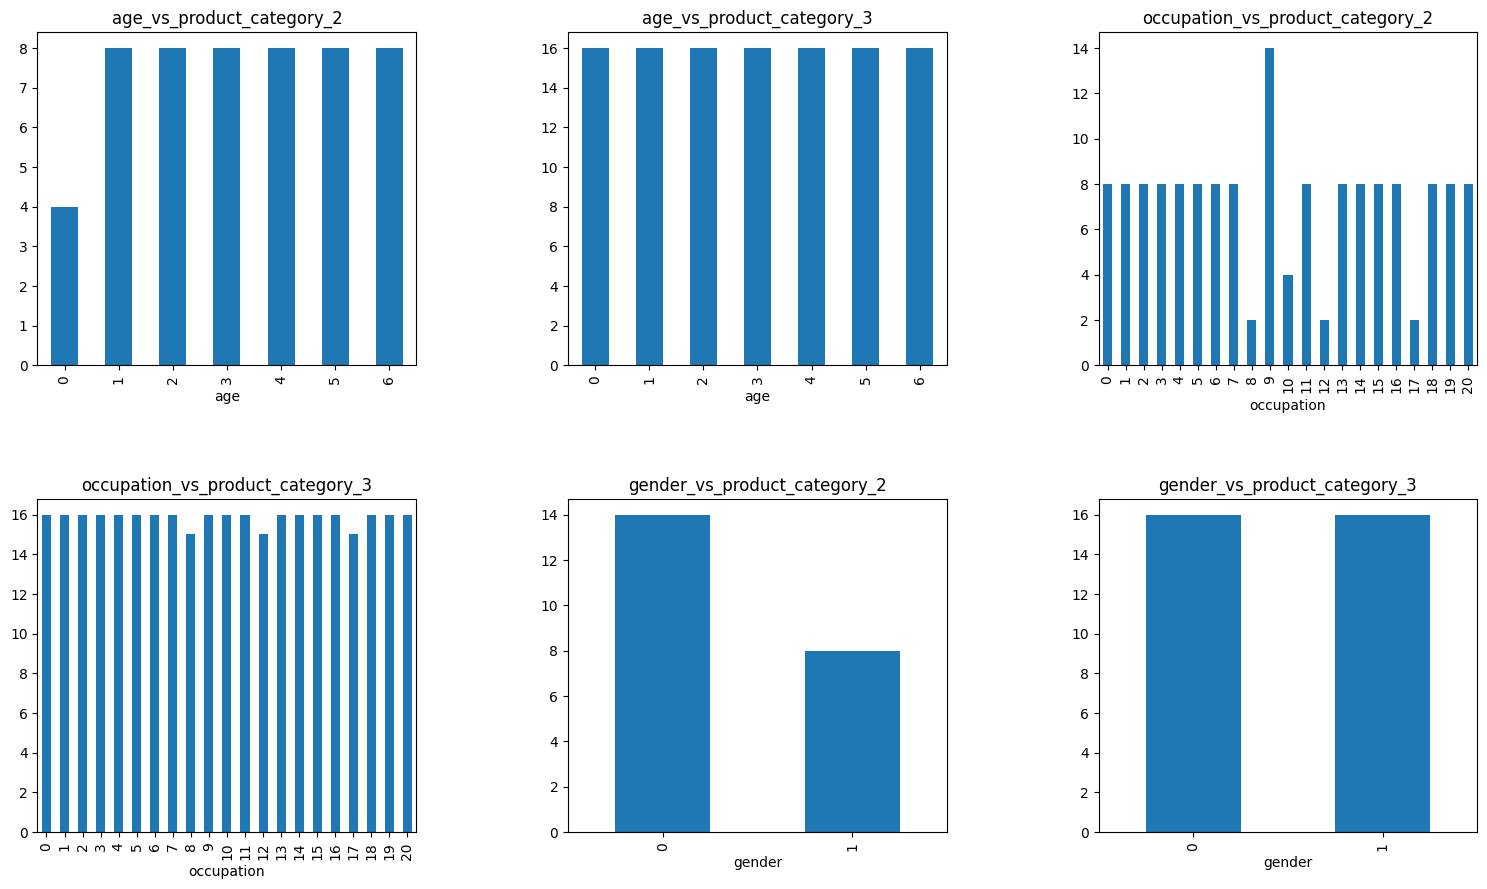

In [254]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,3,1)
age_2.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,3,2)
age_3.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,3,3)
occupation_2.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,3,4)
occupation_3.plot(kind='bar',title="occupation_vs_product_category_3")
plt.subplot(2,3,5)
gender_2.plot(kind='bar',title="gender_vs_product_category_2")
plt.subplot(2,3,6)
gender_3.plot(kind='bar',title="gender_vs_product_category_3")
plt.show()

interestingly especially in terms of occupation and age categories of these columns distributed among product_categories regularly.

In [255]:
def fill_nan_category(category_column, dframe):
    x=dframe.groupby('occupation')[category_column].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        dframe.loc[dframe['occupation']==i,category_column]=dframe.loc[dframe['occupation']==i,category_column].fillna(j)

In [256]:
dfBFriday_copy = dfBFriday.copy()
fill_nan_category('product_category_2', dfBFriday_copy)
fill_nan_category('product_category_3', dfBFriday_copy)
dfBFriday_copy.isna().sum()

user_id                       0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [257]:
y_copy = dfBFriday_copy.loc[:,['purchase']].values.ravel()
X_copy= dfBFriday_copy.drop(['purchase'],axis=1)

X_train_cop, X_test_cop, y_train_cop, y_test_cop = train_test_split(X_copy,y_copy,train_size=0.8, test_size=0.2,random_state=1)

print('Scores from Approach 3')
print(get_random_forest_scores(X_train_cop, X_test_cop, y_train_cop, y_test_cop))

Scores from Approach 3
{'MAE': 2151.4821368939524, 'MSE': 8845892.431825804, 'R2': 0.650702484178367}


It is better than replacing missing values with mean but worse than dropping missing values. Again it is probably due to high variance. What have I done here is similar to replacing with mean value. But it would be better if histograms are not seemingly same size for every occupation category. Since, it is Approach 3's value very close to replacing with mean.

# Build Gradient Boosted Tree Model

In [258]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Xle_train = X_train.copy()
Xle_test = X_test.copy()

mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train, y_train)

y_tst_prd = mdlXgbMlb.predict(Xle_test)

mae = mean_absolute_error(y_test, y_tst_prd)
mse = mean_squared_error(y_test, y_tst_prd)
r2 = r2_score(y_test, y_tst_prd)

print("MAE:{} MSE:{} R2:{}".format(mae, mse, r2))

MAE:2088.6112097944483 MSE:7862981.408350273 R2:0.6895146652465509


Gradient Boosting gave us the best model.

### Tuning Values

In [259]:
mdlXgbMlb = XGBRegressor(n_estimators=10000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train, y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test)

mae = mean_absolute_error(y_test, y_tst_prd)
mse = mean_squared_error(y_test, y_tst_prd)
r2 = r2_score(y_test, y_tst_prd)

print("MAE:{} MSE:{} R2:{}".format(mae, mse, r2))

MAE:2088.6112097944483 MSE:7862981.408350273 R2:0.6895146652465509


This is same as the value without Tuning.